In [1]:
# !pip install torch torchvision torchtext
import torch

In [2]:
# !pip install torchvision

In [3]:
# !pip install torchtext

# 3. Pytorch로 구현하는 ANN(Artificial Neural Network)

## 3.1 텐서와 Autograd

### 3.1.1 텐서의 차원 자유자재로 다루기

In [4]:
x = torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
print(x)

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


In [5]:
print("Size: ",x.size())
print("Shape: ", x.shape)
print("Rank: ", x.ndimension())

Size:  torch.Size([3, 3])
Shape:  torch.Size([3, 3])
Rank:  2


In [6]:
# 랭크 늘리기
x = torch.unsqueeze(x,0)
print(x)
print("Size: ",x.size())
print("Shape: ", x.shape)
print("Rank: ", x.ndimension())

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
Size:  torch.Size([1, 3, 3])
Shape:  torch.Size([1, 3, 3])
Rank:  3


In [7]:
# 랭크 줄이기
x = torch.squeeze(x)
print(x)
print("Size: ",x.size())
print("Shape: ", x.shape)
print("Rank: ", x.ndimension())

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Size:  torch.Size([3, 3])
Shape:  torch.Size([3, 3])
Rank:  2


In [8]:
x = x.view(9)
print(x)
print("Size: ",x.size())
print("Shape: ", x.shape)
print("Rank: ", x.ndimension())

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
Size:  torch.Size([9])
Shape:  torch.Size([9])
Rank:  1


In [9]:
try:
    x=x.view(2,4)
except Exception as e:
    print(e)

shape '[2, 4]' is invalid for input of size 9


### 3.1.2 텐서를 이용한 연산과 행렬곱

In [10]:
w = torch.randn(5,3, dtype=torch.float)
x = torch.tensor([[1.0,2.0],[3.0,4.0],[5.0,6.0]])
print("w size : ", w.size())
print("x size : ", x.size())
print("w : ", w)
print("x : ", x)

w size :  torch.Size([5, 3])
x size :  torch.Size([3, 2])
w :  tensor([[-0.9569, -1.0145, -1.0212],
        [-0.6509, -1.0863,  0.2657],
        [-0.7679,  2.0580,  0.4725],
        [-0.0251,  0.3265,  0.5602],
        [-0.5567, -0.8766, -0.2306]])
x :  tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])


In [11]:
b = torch.randn(5,2, dtype=torch.float)
print("b size : ", b.size())
print("b : ", b)

b size :  torch.Size([5, 2])
b :  tensor([[ 2.7216,  0.6475],
        [ 0.7304, -1.7313],
        [ 2.1693,  0.9609],
        [-1.9476, -1.8111],
        [ 1.4177,  0.9639]])


행렬곱은 torch.mm() 함수를 사용해 수행한다.

In [12]:
wx = torch.mm(w,x)
print("wx size:", wx.size())
print("wx:",wx)

wx size: torch.Size([5, 2])
wx: tensor([[ -9.1064, -12.0991],
        [ -2.5812,  -4.0527],
        [  7.7687,   9.5313],
        [  3.7555,   4.6171],
        [ -4.3396,  -6.0034]])


In [13]:
result = wx+b
print("result size:", result.size())
print("result:",result)

result size: torch.Size([5, 2])
result: tensor([[ -6.3848, -11.4515],
        [ -1.8508,  -5.7840],
        [  9.9379,  10.4922],
        [  1.8079,   2.8060],
        [ -2.9219,  -5.0395]])


### 3.1.3 Autograd

Autograd = Auto+GRADient = 자동 기울기<br>
거리(Distance) : 데이터에 대한 정답과 머신러닝 모델이 예측한 결과의 차이<br>
오차(loss) : 학습 데이터로 계산한 거리들의 평균<br>

<h4>경사하강법(Gradient Descent)</h4>
- 오차를 최소화하는 알고리즘 중 대표적인 방법<br>
- 오차를 수학 함수로 표현한 후 미분하여 이 함수의 기울기를 구해 오차의 최솟값이 있는 방향을 찾아내는 알고리즘<br>

In [14]:
w = torch.tensor(1.0, requires_grad=True)

In [15]:
a=w*3

In [16]:
l = a**2

In [17]:
l.backward()
print(f'l을 w로 미분한 값은 {w.grad}')

l을 w로 미분한 값은 18.0


## 3.2 경사하강법으로 이미지 복원하기

In [18]:
import pickle
import matplotlib.pyplot as plt

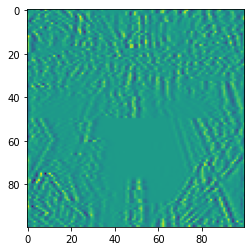

In [19]:
broken_image = torch.FloatTensor( pickle.load(open('./3-min-pytorch-master/03-파이토치로_구현하는_ANN/broken_image_t.p', 'rb'), encoding='latin1'))

plt.imshow(broken_image.view(100,100))

In [20]:
def weird_function(x, n_iter=5):
    h=x
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat((zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0)
        h = filt[0]*h + filt[2]*h_l+filt[1]*h_r
        if i%2==0:
            h = torch.cat((h[h.shape[0]//2:],h[:h.shape[0]//2]),0)
    return h

In [21]:
def distance_loss(hypothesis, broken_image):
    return torch.dist(hypothesis, broken_image)

In [22]:
random_tensor = torch.randn(10000, dtype=torch.float)

In [23]:
lr = 0.8

Loss at 0 = 12.046671867370605
Loss at 1000 = 1.161966323852539
Loss at 2000 = 0.5504432916641235
Loss at 3000 = 0.37749481201171875
Loss at 4000 = 0.29572775959968567
Loss at 5000 = 0.24647235870361328
Loss at 6000 = 0.21160824596881866
Loss at 7000 = 0.18410521745681763
Loss at 8000 = 0.1608138084411621
Loss at 9000 = 0.14015504717826843
Loss at 10000 = 0.12126124650239944
Loss at 11000 = 0.10361795872449875
Loss at 12000 = 0.0868992730975151
Loss at 13000 = 0.0708874762058258
Loss at 14000 = 0.05543133616447449
Loss at 15000 = 0.04042331129312515
Loss at 16000 = 0.025788431987166405
Loss at 17000 = 0.02116132527589798
Loss at 18000 = 0.02116682380437851
Loss at 19000 = 0.021167779341340065


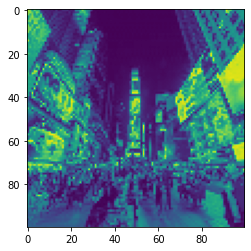

In [24]:
for i in range(20000):
    random_tensor.requires_grad_(True)
    hypothesis = weird_function(random_tensor)
    loss = distance_loss(hypothesis, broken_image)
    loss.backward()
    
    with torch.no_grad():
        random_tensor = random_tensor - lr*random_tensor.grad
        if i % 1000 == 0:
            print(f'Loss at {i} = {loss.item()}')
plt.imshow(random_tensor.view(100,100).data)

## 3.3 신경망 모델 구현하기

### 3.3.1 인공 신경망(ANN)

In [25]:
import numpy
from sklearn.datasets import make_blobs
import torch.nn.functional as F

In [26]:
n_dim = 2
x_train, y_train = make_blobs(n_samples=80, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]], shuffle=True, cluster_std=0.3)
x_test, y_test = make_blobs(n_samples=20, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]], shuffle=True, cluster_std=0.3)

In [27]:
def label_map(y_, from_, to_):
    y = numpy.copy(y_)
    for f in from_:
        y[y_ == f] = to_
    return y

y_train = label_map(y_train, [0,1], 0)
y_train = label_map(y_train, [2,3], 1)
y_test = label_map(y_test, [0,1], 0)
y_test = label_map(y_test, [2,3], 1)

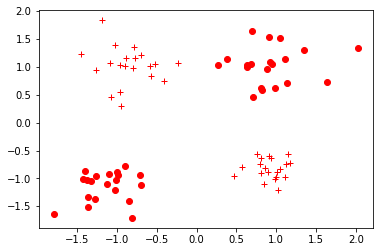

In [29]:
def vis_data(x,y=None, c='r'):
    if y is None:
        y = [None]*len(x)
    for x_, y_ in zip(x,y):
        if y_ is None:
            plt.plot(x_[0], x_[1], '*', markerfacecolor='none', markeredgecolor=c)
        else:
            plt.plot(x_[0], x_[1], c+'o' if y_==0 else c+'+')
plt.figure()
vis_data(x_train, y_train, c='r')
plt.show()

In [30]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

In [34]:
class NeuralNet(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        
        self.linear_1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.linear_2 = torch.nn.Linear(self.hidden_size, 1)
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self, input_tensor):
        linear1 = self.linear_1(input_tensor)
        relu = self.relu(linear1)
        linear2 = self.linear_2(relu)
        output = self.sigmoid(linear2)
        return output

In [35]:
model = NeuralNet(2, 5)
learning_rate = 0.03
criterion = torch.nn.BCELoss()

In [36]:
epochs = 2000

In [37]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [38]:
model.eval()
test_loss_before = criterion(model(x_test).squeeze(), y_test)
print(f'Before Trainingm test loss is {test_loss_before.item()}')

Before Trainingm test loss is 0.6762865781784058


In [40]:
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    
    train_output = model(x_train)
    
    train_loss =criterion(train_output.squeeze(), y_train)
    
    if epoch%100 == 0:
        print(f'Train loss at {epoch} is {train_loss.item()}')
        
    train_loss.backward()
    optimizer.step()

Train loss at 0 is 0.6690540909767151
Train loss at 100 is 0.5918448567390442
Train loss at 200 is 0.513781726360321
Train loss at 300 is 0.439260870218277
Train loss at 400 is 0.35709160566329956
Train loss at 500 is 0.2728036344051361
Train loss at 600 is 0.20029225945472717
Train loss at 700 is 0.14663246273994446
Train loss at 800 is 0.1104051023721695
Train loss at 900 is 0.08638855069875717
Train loss at 1000 is 0.06986581534147263
Train loss at 1100 is 0.058087073266506195
Train loss at 1200 is 0.04941435903310776
Train loss at 1300 is 0.042826343327760696
Train loss at 1400 is 0.037676140666007996
Train loss at 1500 is 0.03356067091226578
Train loss at 1600 is 0.03021199069917202
Train loss at 1700 is 0.027443528175354004
Train loss at 1800 is 0.02511821687221527
Train loss at 1900 is 0.02314057946205139


In [42]:
# evaluation
model.eval()
test_loss_before = criterion(torch.squeeze(model(x_test)), y_test)
print(f'After Training, test loss is {test_loss_before.item()}')

After Training, test loss is 0.020285263657569885


In [43]:
torch.save(model.state_dict(), './model.pt')
print(f'state_dict format of the model: {model.state_dict()}')

state_dict format of the model: OrderedDict([('linear_1.weight', tensor([[ 1.2883,  1.3051],
        [-1.0086,  0.6057],
        [ 1.4213, -1.7097],
        [-1.5230, -1.6618],
        [-1.4960,  1.0144]])), ('linear_1.bias', tensor([ 0.3186,  0.1736, -0.0652, -0.1090,  0.2455])), ('linear_2.weight', tensor([[-1.6915,  1.0471,  2.1624, -2.1695,  1.6895]])), ('linear_2.bias', tensor([-0.1217]))])


In [44]:
new_model = NeuralNet(2,5)
new_model.load_state_dict(torch.load('./model.pt'))

<All keys matched successfully>

In [45]:
new_model.eval()
print(f'벡터 [-1,1]이 레이블 1을 가질 확률은 {new_model(torch.FloatTensor([-1,1])).item()}')

벡터 [-1,1]이 레이블 1을 가질 확률은 0.9970967769622803
